In this recipe, we solve a 2D regression problems with the matrix inverse method. Regression coefficients can be directly evaluated using the following expression.
$$W=(X^{T}X)^{-1}X^{T}y$$

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [57]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

In [58]:
X_vals = np.linspace(0, 10, 100).reshape(-1,1)
y_vals = X_vals + np.random.normal(0, 1, 100).reshape(-1,1)
print("Shape of X_vals ",X_vals.shape)
print("Shape of y_vals ",y_vals.shape)

Shape of X_vals  (100, 1)
Shape of y_vals  (100, 1)


In [59]:
m=len(X_vals)
X_padded = np.column_stack((X_vals,np.ones((m,1))))

In [60]:
W = tf.matmul(tf.transpose(X_padded),X_padded)
W = tf.matmul(tf.matrix_inverse(W),tf.transpose(X_padded))
W = tf.matmul(W,y_vals)
solution = sess.run(W)

In [61]:
slope = solution[0][0]
y_intercept = solution[1][0]

slope: 0.992991242788
y_intercept: -0.0827559984976


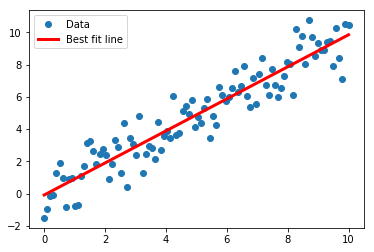

In [62]:
print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

# Get best fit line
best_fit = []
for i in X_vals:
  best_fit.append(slope*i+y_intercept)

# Plot the results
plt.plot(X_vals, y_vals, 'o', label='Data')
plt.plot(X_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()

Conclusion and Remark: The recipe doesn't involve any hyperparameters like learning rates or number of iterations. However, it is computationally inefficient especially when the dataset is huge. 